In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Descriptive Analytics

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.shape

(4521, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

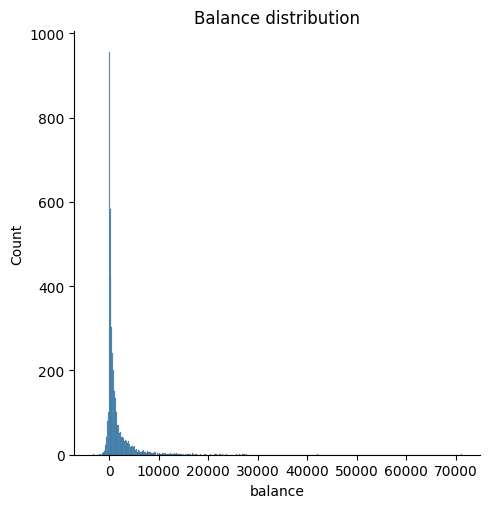

In [6]:
#Distribution plots
sns.displot(df['balance'])
plt.title('Balance distribution')
plt.show()

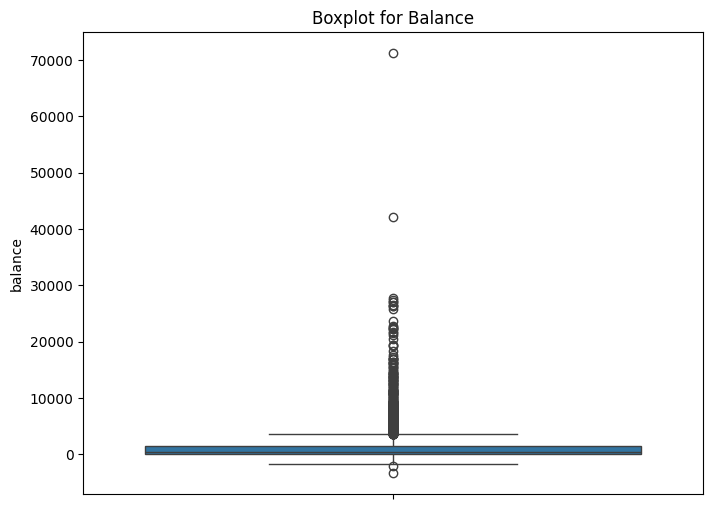

In [142]:
#Visualise outliers in Balance
plt.figure(figsize=(8,6))
sns.boxplot(df['balance'])
plt.title("Boxplot for Balance")
plt.show()

In [145]:
#Unique values for column
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,marital_numeric,default_numeric,education_numeric,housing_numeric,loan_numeric
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,1,-1,0,unknown,no,1,0,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,339,4,failure,no,1,0,2,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,330,1,failure,no,0,0,3,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,4,-1,0,unknown,no,1,0,3,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,2,1,0


In [24]:
#Create a new dataframe copying original df to not tamper with original data 
df2 = df.copy()

In [39]:
#Unique values
df2['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [42]:
#Creating a dictionary to map object columns to treat them to be numeric. Creating a dictionary to make converting columns cleaner
mapping_dict = {
    'marital': {'single': 0, 'married': 1, 'divorced': 2},
    'default': {'yes': 1, 'no': 0},
    'education': {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'yes': 1, 'no': 0},
    'job' : {'unknown': 0, 'unemployed': 1, 'student': 2, 'housemaid': 3, 'blue-collar': 4, 'self-employed': 5, 'entrepreneur': 6, 'services': 7, 'technician': 8, 'management': 9, 'admin': 10, 'retired': 11}
    }

for col, mapping in mapping_dict.items():
    df2[col] = df2[col].map(mapping)

#dropping un mapped columns from the dataframe and keeping the mapped varsions in df2
df2 = df2.drop(columns=['marital', 'education', 'default', 'housing', 'loan'])
print(df2)

      age  job  balance   contact  day month  duration  campaign  pdays  \
0      30  1.0     1787  cellular   19   oct        79         1     -1   
1      33  7.0     4789  cellular   11   may       220         1    339   
2      35  9.0     1350  cellular   16   apr       185         1    330   
3      30  9.0     1476   unknown    3   jun       199         4     -1   
4      59  4.0        0   unknown    5   may       226         1     -1   
...   ...  ...      ...       ...  ...   ...       ...       ...    ...   
4516   33  7.0     -333  cellular   30   jul       329         5     -1   
4517   57  5.0    -3313   unknown    9   may       153         1     -1   
4518   57  8.0      295  cellular   19   aug       151        11     -1   
4519   28  4.0     1137  cellular    6   feb       129         4    211   
4520   44  6.0     1136  cellular    3   apr       345         2    249   

      previous poutcome   y  marital_numeric  default_numeric  \
0            0  unknown  no       

In [43]:
#Descriptive overview of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4521 non-null   int64  
 1   job                4043 non-null   float64
 2   balance            4521 non-null   int64  
 3   contact            4521 non-null   object 
 4   day                4521 non-null   int64  
 5   month              4521 non-null   object 
 6   duration           4521 non-null   int64  
 7   campaign           4521 non-null   int64  
 8   pdays              4521 non-null   int64  
 9   previous           4521 non-null   int64  
 10  poutcome           4521 non-null   object 
 11  y                  4521 non-null   object 
 12  marital_numeric    4521 non-null   int64  
 13  default_numeric    4521 non-null   int64  
 14  education_numeric  4521 non-null   int64  
 15  housing_numeric    4521 non-null   int64  
 16  loan_numeric       4521 

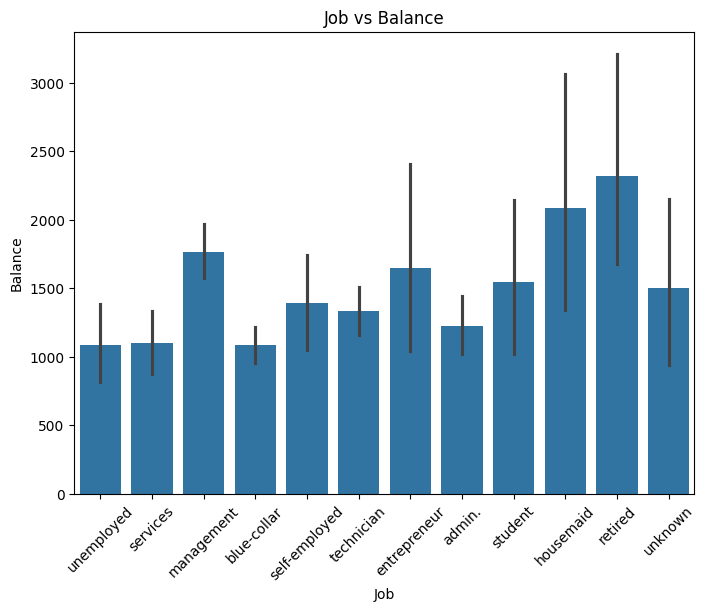

In [146]:
#Visualise Job category vs Balance
plt.figure(figsize=(8,6))
sns.barplot(x = 'job', y = 'balance', data = df)
plt.title('Job vs Balance')
plt.xlabel('Job')
plt.ylabel('Balance')
#Rotate category titles 45 degrees to increase readability
plt.xticks(rotation = 45)
plt.show()

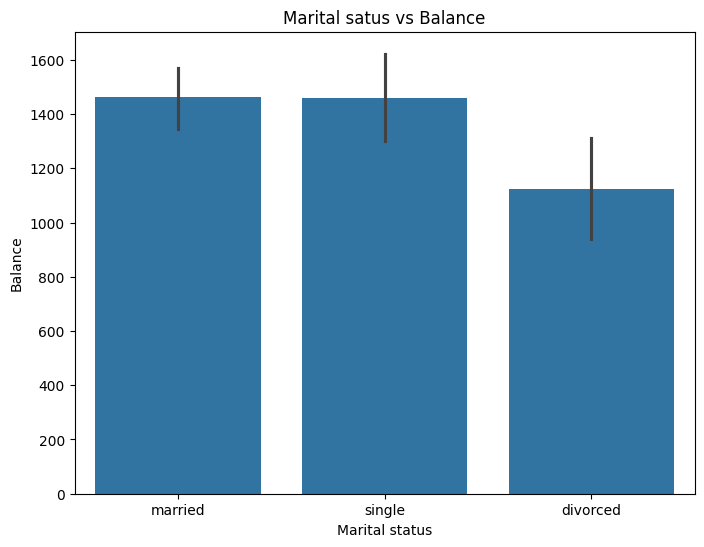

In [122]:
#Visualising balance by marital status 
plt.figure(figsize=(8,6))
sns.barplot(x = 'marital', y = 'balance', data = df)
plt.title('Marital satus vs Balance')
plt.xlabel('Marital status')
plt.ylabel('Balance')
plt.show()

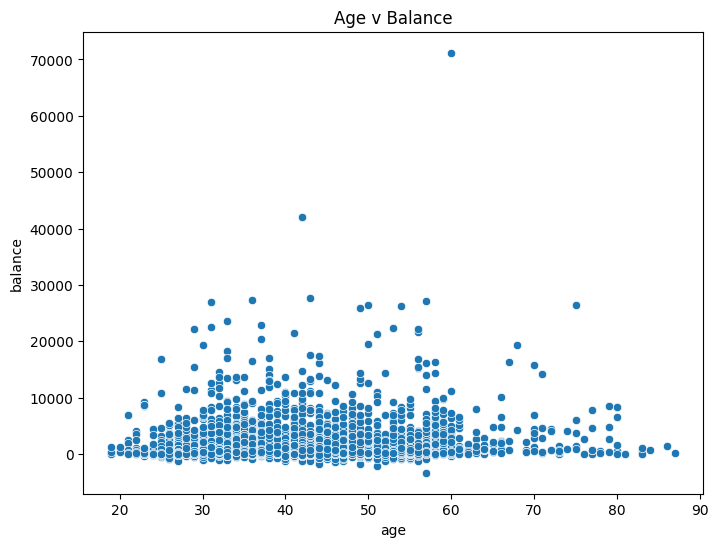

In [123]:
#Visualising age wise balance and identifying significant outliers 
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'age', y = 'balance', data = df)
plt.title('Age v Balance')
plt.show()

The outliers catch immediate attention showing a balance of above 70000 being in the 60 year age group. Apart from the striking outlier, there are other significant outliers. The mean balance is 1422.65 and as evidenced in the scatterplot, a number of values lie outside the mean proving to be significant.

Data Analysis

In [97]:
#Filter df and store values that have a balance greater than 10,000 in 'filtered_vals_df' 
filtered_vals_df = df[df['balance'] > 10000][['job', 'marital', 'loan', 'y', 'poutcome', 'balance']]
print('Values with balance higher than 10,000: ')
print(filtered_vals_df)

Values with balance higher than 10,000: 
                job  marital loan   y poutcome  balance
40       management   single   no  no  failure    11971
64           admin.  married   no  no  unknown    16873
94      blue-collar  married   no  no  unknown    14093
213   self-employed  married   no  no  unknown    11494
272      management  married   no  no  unknown    12186
...             ...      ...  ...  ..      ...      ...
4363    blue-collar   single   no  no  failure    13156
4369     technician  married   no  no  unknown    16063
4394    blue-collar  married   no  no  unknown    10910
4440    blue-collar  married   no  no  unknown    13117
4441     management  married   no  no  unknown    12877

[92 rows x 6 columns]


92 out of 4521 rows have been filtered as having a balance greater than 10,000.

In [112]:
#Individuals with a balance greater than 30,000
super_high = filtered_vals_df[filtered_vals_df['balance'] > 30000]
print(super_high)

               job  marital loan   y poutcome  balance
2989  entrepreneur  married   no  no  unknown    42045
3700       retired  married   no  no  unknown    71188


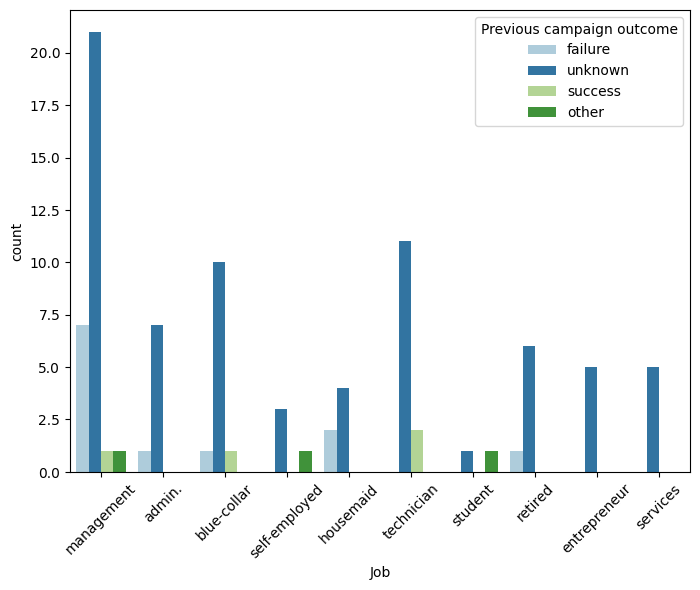

In [116]:
#Visualise previous Campaign outcomes for filtered data by job category
plt.figure(figsize=(8,6))
sns.countplot(data = filtered_vals_df, x = 'job', hue = 'poutcome', palette = 'Paired')
plt.xlabel('Job')
plt.xticks(rotation = 45)
plt.legend(title = 'Previous campaign outcome')
plt.show()

In [117]:
#Filter data for average and below average customers holding a balance of average 1422 or lower
below_average_filtered_df =  df[df['balance'] < 1422.65][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Values with balance less than the average of 1422: ')
print(below_average_filtered_df)

Values with balance less than the average of 1422: 
                job  marital loan  balance   y poutcome
2        management   single   no     1350  no  failure
4       blue-collar  married   no        0  no  unknown
5        management   single   no      747  no  failure
6     self-employed  married   no      307  no    other
7        technician  married   no      147  no  unknown
...             ...      ...  ...      ...  ..      ...
4516       services  married   no     -333  no  unknown
4517  self-employed  married  yes    -3313  no  unknown
4518     technician  married   no      295  no  unknown
4519    blue-collar  married   no     1137  no    other
4520   entrepreneur   single  yes     1136  no    other

[3359 rows x 6 columns]


In [120]:
#Successful campaign outcomes
successful_campaign =  df[df['poutcome'] == 'success'][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Successful previous campaigns: ')
print(successful_campaign)

Successful previous campaigns: 
              job   marital loan  balance    y poutcome
49         admin.   married   no     4629  yes  success
70     management   married   no        0  yes  success
98    blue-collar  divorced   no     2843   no  success
110       student    single   no     2488  yes  success
156        admin.   married   no      602  yes  success
...           ...       ...  ...      ...  ...      ...
4309     services    single   no     1547   no  success
4323      retired  divorced   no        0   no  success
4433   management   married  yes      -17  yes  success
4458   management    single   no      572  yes  success
4459       admin.    single   no      223   no  success

[129 rows x 6 columns]


In [121]:
#Failed campaign outcomes
failed_campaigns = df[df['poutcome'] == 'failure'][['job', 'marital', 'loan', 'balance', 'y', 'poutcome']]
print('Failed previous campaigns: ')
print(failed_campaigns)

Failed previous campaigns: 
              job  marital loan  balance    y poutcome
1        services  married  yes     4789   no  failure
2      management   single   no     1350   no  failure
5      management   single   no      747   no  failure
9        services  married  yes      -88   no  failure
14    blue-collar  married  yes      360   no  failure
...           ...      ...  ...      ...  ...      ...
4485  blue-collar  married   no      238   no  failure
4489   management  married   no     6945   no  failure
4492   technician   single  yes      309   no  failure
4504  blue-collar   single  yes     1080  yes  failure
4514  blue-collar  married   no     1205   no  failure

[490 rows x 6 columns]


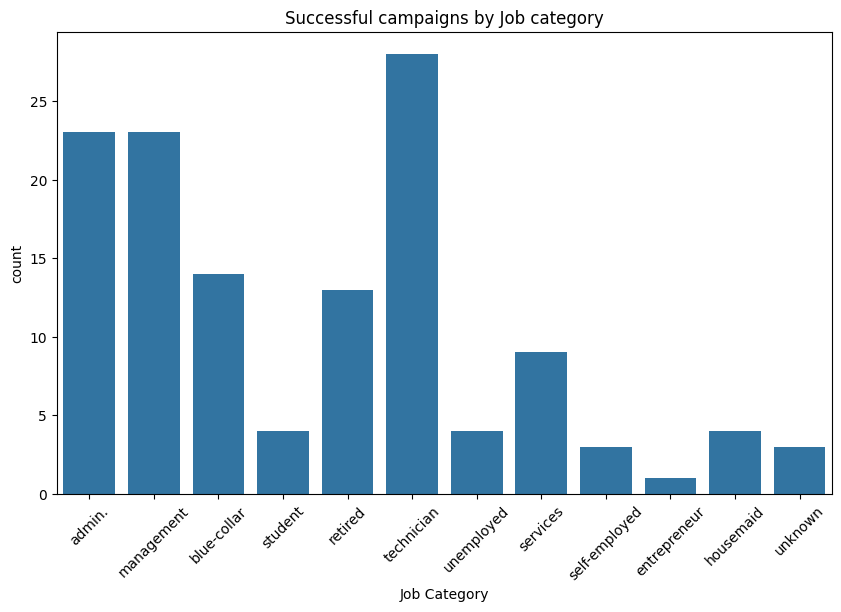

In [134]:
#Visualise Successful campaigns by job category
plt.figure(figsize = (10,6))
sns.countplot(x = 'job', data = successful_campaign)
plt.title("Successful campaigns by Job category")
plt.xlabel("Job Category")
plt.xticks(rotation=45)
plt.show()

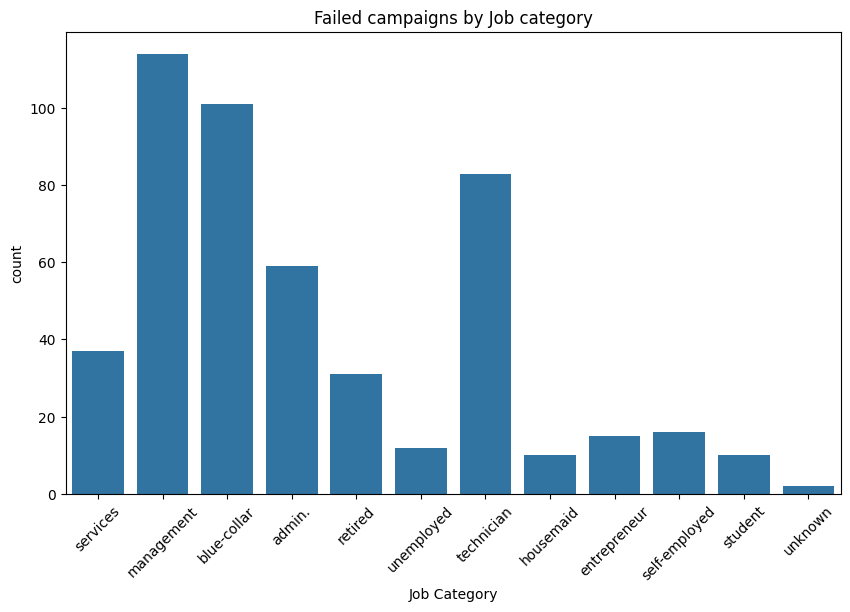

In [135]:
#Visualise failed campaigns by job category
plt.figure(figsize=(10,6))
sns.countplot(x = 'job', data = failed_campaigns)
plt.title('Failed campaigns by Job category')
plt.xlabel('Job Category')
plt.xticks(rotation = 45)
plt.show()

In [171]:
#Print Technicians demographic for marital status as they are the leading job category for successful campaigns
technician_successful_campaign_marital_status = successful_campaign[successful_campaign['job'] == 'technician'][['job', 'marital']]
grouped = technician_successful_campaign_marital_status.groupby('marital').size()
print("Successful campaign outcomes - Technicians marital demographic:")
for name, count in grouped.items():
    print(f"\nMarital status: {name}, Count: {count}")

Successful campaign outcomes - Technicians marital demographic:

Marital status: divorced, Count: 1

Marital status: married, Count: 16

Marital status: single, Count: 11


In [172]:
#Failed campaign outcomes for technicians
technician_failed_campaign_marital_status = failed_campaigns[failed_campaigns['job'] == 'technician'][['job', 'marital']]
grouped = technician_failed_campaign_marital_status.groupby('marital').size()
print("Failed campaign outcomes - Technicians marital demographic:")
for name, count in grouped.items():
    print(f"\nMarital status: {name}, Count: {count}")

Failed campaign outcomes - Technicians marital demographic:

Marital status: divorced, Count: 9

Marital status: married, Count: 45

Marital status: single, Count: 29
